# Load Libraries & Dataset
## Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

import missingno

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, PowerTransformer, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, learning_curve
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\pyproj\__init__.py:73: UserWarning:

Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.

PROJ: proj_create_from_database: Cannot find proj.db


## Dataset

In [2]:
pd.set_option("display.max_columns", None)
df_train = pd.read_csv("dataset/train.csv")
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [3]:
df_test = pd.read_csv("dataset/test.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

# Pre-Processing

## Mapping Ordinal Features

In [4]:
qualCond_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'None': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'None': 0}

In [5]:
ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond', 'FireplaceQu', 'PoolQC']
for col in ord_col:
    df_train[col] = df_train[col].map(qualCond_map)
    df_test[col] = df_test[col].map(qualCond_map)
    
fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    df_train[col] = df_train[col].map(fintype_map)
    df_test[col] = df_test[col].map(fintype_map)

df_train['BsmtExposure'] = df_train['BsmtExposure'].map(expose_map)
df_test['BsmtExposure'] = df_test['BsmtExposure'].map(expose_map)
df_train['Fence'] = df_train['Fence'].map(fence_map)
df_test['Fence'] = df_test['Fence'].map(fence_map)

## Feature Engineering
### Remove Unnecessary Features

In [6]:
df_train = df_train.drop(['Id', 'Utilities', 'Street', 'PoolQC',], axis=1)
df_test = df_test.drop(['Id', 'Utilities', 'Street', 'PoolQC',], axis=1)

## Mapping Numerical & Categorical Features

In [7]:
df_train["MSSubClass"] = df_train["MSSubClass"].astype(str)
df_test["MSSubClass"] = df_test["MSSubClass"].astype(str)

In [8]:
def classify_variables(data):
    continuous_vars = []
    discrete_vars = []
    nominal_vars = []
    ordinal_vars = []

    for col in data.columns:
        if np.issubdtype(data[col].dtype, np.number):  # numerical
            if data[col].nunique() <= 12:  # heuristic: if less than 10 unique values, consider it discrete
                print(f'{col} is likely a discrete numerical variable.')
                discrete_vars.append(col)
            else:
                print(f'{col} is likely a continuous numerical variable.')
                continuous_vars.append(col)
        else:  # categorical
            if pd.api.types.is_categorical_dtype(data[col]):  # if the column type is already categorical
                if hasattr(data[col].cat, 'ordered') and data[col].cat.ordered:  # if it's an ordered category
                    print(f'{col} is likely an ordinal categorical variable.')
                    ordinal_vars.append(col)
                else:
                    print(f'{col} is likely a nominal categorical variable.')
                    nominal_vars.append(col)
            else:  # if it's object or something else
                print(f'{col} is likely a nominal categorical variable.')  # default to nominal, as we can't infer order
                nominal_vars.append(col)
                
    return continuous_vars, discrete_vars, nominal_vars, ordinal_vars

def len_variable(var, var_name):
    return f"{var_name} has {len(var)} index data"

In [9]:
continuous_vars, discrete_vars, nominal_vars, ordinal_vars = classify_variables(df_train)

ordinal_vars = ["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", 
 "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC", 
 "Fence"]

# continuous_vars.remove("Id")
continuous_vars = [i for i in continuous_vars if i not in ordinal_vars and i in df_train.columns.tolist()]
discrete_vars = [i for i in discrete_vars if i not in ordinal_vars and i in df_train.columns.tolist()]
nominal_vars = [i for i in nominal_vars if i not in ordinal_vars and i in df_train.columns.tolist()]
ordinal_vars = [i for i in ordinal_vars if i in df_train.columns.tolist()]

# discrete_vars.append(["YearBuilt", "YearRemodAdd", "GarageYrBlt"])

print("\n==============\n")
print(len_variable(continuous_vars, "Continuous Variable"))
print(len_variable(discrete_vars, "Discrete Variable"))
print(len_variable(nominal_vars, "Nominal Variable"))
print(len_variable(ordinal_vars, "Ordinal Variable"))

numeric_vars = continuous_vars + discrete_vars

MSSubClass is likely a nominal categorical variable.
MSZoning is likely a nominal categorical variable.
LotFrontage is likely a continuous numerical variable.
LotArea is likely a continuous numerical variable.
Alley is likely a nominal categorical variable.
LotShape is likely a nominal categorical variable.
LandContour is likely a nominal categorical variable.
LotConfig is likely a nominal categorical variable.
LandSlope is likely a nominal categorical variable.
Neighborhood is likely a nominal categorical variable.
Condition1 is likely a nominal categorical variable.
Condition2 is likely a nominal categorical variable.
BldgType is likely a nominal categorical variable.
HouseStyle is likely a nominal categorical variable.
OverallQual is likely a discrete numerical variable.
OverallCond is likely a discrete numerical variable.
YearBuilt is likely a continuous numerical variable.
YearRemodAdd is likely a continuous numerical variable.
RoofStyle is likely a nominal categorical variable.
R

### Combining Features

In [10]:
df_train['AgeSold'] = df_train['YrSold'] - df_train['YearBuilt']
df_train['AgeRemodSold'] = df_train['YrSold'] - df_train['YearRemodAdd']
df_train['OverallHouseScore'] = (df_train['OverallQual'] + df_train['OverallCond'])/2
df_train['GarageAge'] = df_train['YrSold'] - df_train['GarageYrBlt']
df_train['GarageAreaRatio'] = df_train['GarageArea'] / df_train["GarageCars"]
df_train['TotalLot'] = df_train['LotFrontage'] + df_train['LotArea']
df_train['TotalBsmtFin'] = df_train['BsmtFinSF1'] + df_train['BsmtFinSF2']
df_train['YrBltAndRemod']=df_train['YearBuilt']+df_train['YearRemodAdd']
df_train['TotalSF']=df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['Total_sqr_footage'] = (df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] +
                                 df_train['1stFlrSF'] + df_train['2ndFlrSF'])
df_train['Total_Bathrooms'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) +
                               df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))
df_train['Total_porch_sf'] = (df_train['OpenPorchSF'] + df_train['3SsnPorch'] +
                              df_train['EnclosedPorch'] + df_train['ScreenPorch'] +
                              df_train['WoodDeckSF'])

df_train['haspool'] = df_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['has2ndfloor'] = df_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasgarage'] = df_train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasbsmt'] = df_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasfireplace'] = df_train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasmasvnr'] = df_train['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasbsmtfin'] = df_train['TotalBsmtFin'].apply(lambda x: 1 if x > 0 else 0)
df_train["hasporch"] = df_train["Total_porch_sf"].apply(lambda x: 1 if x > 0 else 0)

In [11]:
df_test['AgeSold'] = df_test['YrSold'] - df_test['YearBuilt']
df_test['AgeRemodSold'] = df_test['YrSold'] - df_test['YearRemodAdd']
df_test['OverallHouseScore'] = (df_test['OverallQual'] + df_test['OverallCond'])/2
df_test['GarageAge'] = df_test['YrSold'] - df_test['GarageYrBlt']
df_test['GarageAreaRatio'] = df_test['GarageArea'] / df_test["GarageCars"]
df_test['TotalLot'] = df_test['LotFrontage'] + df_test['LotArea']
df_test['TotalBsmtFin'] = df_test['BsmtFinSF1'] + df_test['BsmtFinSF2']
df_test['YrBltAndRemod']=df_test['YearBuilt']+df_test['YearRemodAdd']
df_test['TotalSF']=df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']
df_test['Total_sqr_footage'] = (df_test['BsmtFinSF1'] + df_test['BsmtFinSF2'] +
                                 df_test['1stFlrSF'] + df_test['2ndFlrSF'])
df_test['Total_Bathrooms'] = (df_test['FullBath'] + (0.5 * df_test['HalfBath']) +
                               df_test['BsmtFullBath'] + (0.5 * df_test['BsmtHalfBath']))
df_test['Total_porch_sf'] = (df_test['OpenPorchSF'] + df_test['3SsnPorch'] +
                              df_test['EnclosedPorch'] + df_test['ScreenPorch'] +
                              df_test['WoodDeckSF'])

df_test['haspool'] = df_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_test['has2ndfloor'] = df_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasgarage'] = df_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasbsmt'] = df_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasfireplace'] = df_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasmasvnr'] = df_test['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasbsmtfin'] = df_test['TotalBsmtFin'].apply(lambda x: 1 if x > 0 else 0)
df_test["hasporch"] = df_test["Total_porch_sf"].apply(lambda x: 1 if x > 0 else 0)

## Remove Features that mostly contain only 1 value

In [12]:
# categorical
cat_col = df_train.select_dtypes(include=['object']).columns
overfit_cat = []
for i in cat_col:
    counts = df_train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(df_train) * 100 > 96:
        overfit_cat.append(i)

overfit_cat = list(overfit_cat)
df_train = df_train.drop(overfit_cat, axis=1)
df_test = df_test.drop(overfit_cat, axis=1)

# numerical
num_col = df_train.select_dtypes(exclude=['object']).columns
overfit_num = []
for i in num_col:
    counts = df_train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(df_train) * 100 > 96:
        overfit_num.append(i)

overfit_num = list(overfit_num)
df_train = df_train.drop(overfit_num, axis=1)
df_test = df_test.drop(overfit_num, axis=1)

## Check Outliers

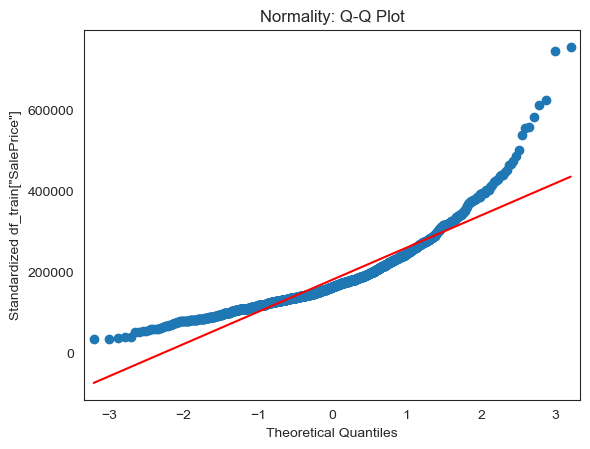

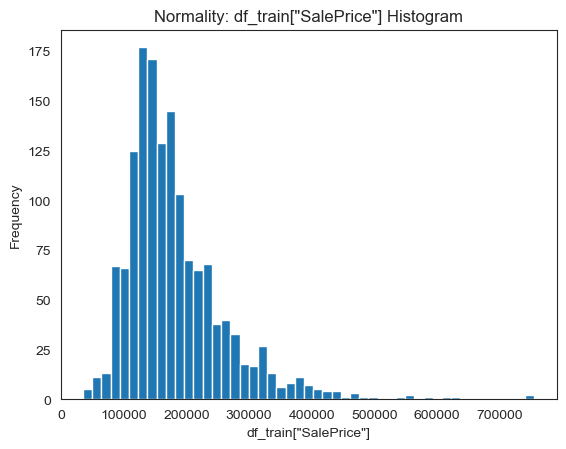

Shapiro-Wilk Test:
Test Statistic: 0.869672954082489
p-value: 3.2072044604461286e-33
The df_train["SalePrice"] do not appear to be normally distributed (reject H0)


In [13]:
sm.qqplot(df_train["SalePrice"], line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized df_train["SalePrice"]')
plt.title('Normality: Q-Q Plot')
plt.show()

plt.hist(df_train["SalePrice"], bins='auto')
plt.xlabel('df_train["SalePrice"]')
plt.ylabel('Frequency')
plt.title('Normality: df_train["SalePrice"] Histogram')
plt.show()

# Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(df_train["SalePrice"])
print('Shapiro-Wilk Test:')
print('Test Statistic:', stat)
print('p-value:', p_value)

alpha = 0.05
if p_value > alpha:
    print('The df_train["SalePrice"] appear to be normally distributed (fail to reject H0)')
else:
    print('The df_train["SalePrice"] do not appear to be normally distributed (reject H0)')

## Transform Target Feature
### Log

In [14]:
# log(1+x) transform
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

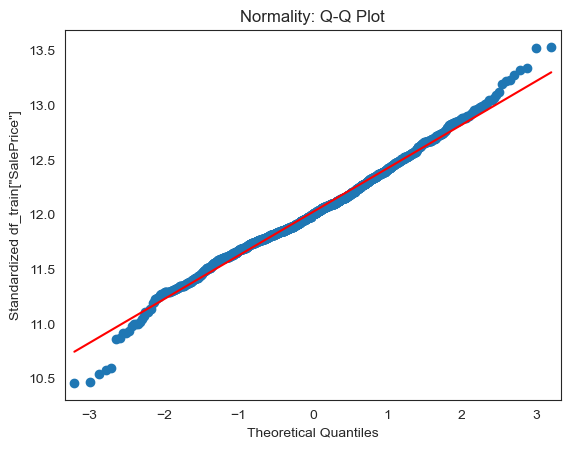

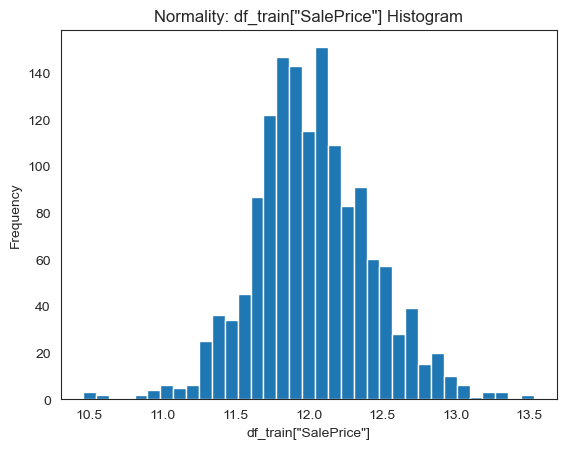

Shapiro-Wilk Test:
Test Statistic: 0.9912075400352478
p-value: 1.1504476304935451e-07
The df_train["SalePrice"] do not appear to be normally distributed (reject H0)


In [15]:
sm.qqplot(df_train["SalePrice"], line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized df_train["SalePrice"]')
plt.title('Normality: Q-Q Plot')
plt.show()

plt.hist(df_train["SalePrice"], bins='auto')
plt.xlabel('df_train["SalePrice"]')
plt.ylabel('Frequency')
plt.title('Normality: df_train["SalePrice"] Histogram')
plt.show()

# Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(df_train["SalePrice"])
print('Shapiro-Wilk Test:')
print('Test Statistic:', stat)
print('p-value:', p_value)

alpha = 0.05
if p_value > alpha:
    print('The df_train["SalePrice"] appear to be normally distributed (fail to reject H0)')
else:
    print('The df_train["SalePrice"] do not appear to be normally distributed (reject H0)')

#### Remove Outliers

In [16]:
df_train = df_train[(df_train["SalePrice"] >= 11.0) & (df_train["SalePrice"] <= 13.0)]

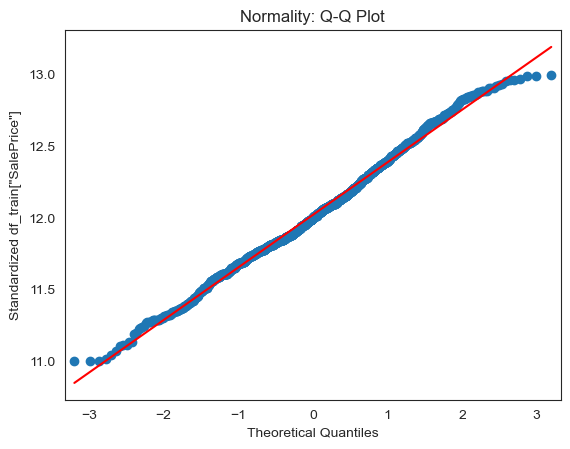

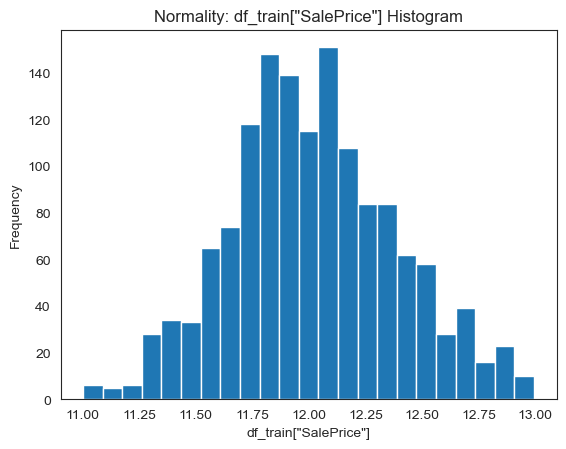

Shapiro-Wilk Test:
Test Statistic: 0.9944359660148621
p-value: 3.459872823441401e-05
The df_train["SalePrice"] do not appear to be normally distributed (reject H0)


In [17]:
sm.qqplot(df_train["SalePrice"], line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized df_train["SalePrice"]')
plt.title('Normality: Q-Q Plot')
plt.show()

plt.hist(df_train["SalePrice"], bins='auto')
plt.xlabel('df_train["SalePrice"]')
plt.ylabel('Frequency')
plt.title('Normality: df_train["SalePrice"] Histogram')
plt.show()

# Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(df_train["SalePrice"])
print('Shapiro-Wilk Test:')
print('Test Statistic:', stat)
print('p-value:', p_value)

alpha = 0.05
if p_value > alpha:
    print('The df_train["SalePrice"] appear to be normally distributed (fail to reject H0)')
else:
    print('The df_train["SalePrice"] do not appear to be normally distributed (reject H0)')

### Yeo-Johnson

In [18]:
# # Create a PowerTransformer instance to apply the Yeo-Johnson transformation to the target feature
# transformer = PowerTransformer(method='yeo-johnson', standardize=True)  # Handle skewed on target feature

# # Fit the transformer on the target feature
# transformer.fit(df_train["SalePrice"].values.reshape(-1, 1))

# # Transform the target variable for both the training and test sets
# df_train["SalePrice_transformed"] = transformer.transform(df_train["SalePrice"].values.reshape(-1, 1))

In [19]:
# sm.qqplot(df_train["SalePrice_transformed"], line='s')
# plt.xlabel('Theoretical Quantiles')
# plt.ylabel('Standardized df_train["SalePrice_transformed"]')
# plt.title('Normality: Q-Q Plot')
# plt.show()

# plt.hist(df_train["SalePrice_transformed"], bins='auto')
# plt.xlabel('df_train["SalePrice_transformed"]')
# plt.ylabel('Frequency')
# plt.title('Normality: df_train["SalePrice_transformed"] Histogram')
# plt.show()

# # Shapiro-Wilk test for normality
# stat, p_value = stats.shapiro(df_train["SalePrice_transformed"])
# print('Shapiro-Wilk Test:')
# print('Test Statistic:', stat)
# print('p-value:', p_value)

# alpha = 0.05
# if p_value > alpha:
#     print('The df_train["SalePrice_transformed"] appear to be normally distributed (fail to reject H0)')
# else:
#     print('The df_train["SalePrice_transformed"] do not appear to be normally distributed (reject H0)')

## Splitting Data

In [20]:
X_train = df_train.drop(["SalePrice"], axis=1)
y_train = df_train["SalePrice"]

X_test = df_test

In [21]:
numeric_vars = [i for i in numeric_vars if i in X_train.columns.tolist()]
nominal_vars = [i for i in nominal_vars if i in X_train.columns.tolist()]
ordinal_vars = [i for i in ordinal_vars if i in X_train.columns.tolist()]

# Helper Function

## Pipeline
### Fill Missing Values

In [22]:
# fill missing values in numerical features
for col in numeric_vars:
    if col not in ["YearRemodAdd", "GarageYrBlt", "YrSold"]:
        median_num_features = X_train.groupby(["Neighborhood", "BldgType"])[col].median()
        X_train.loc[:, col] = X_train.apply(
            lambda row: median_num_features.loc[row["Neighborhood"], row["BldgType"]]
                         if pd.isnull(row[col])
                         else row[col],
            axis=1
        )
    else:
        #Fill GarageYrBlt column
        X_train.loc[:, col] = np.where(
            X_train[col] != 0,
            X_train["GarageYrBlt"].fillna(X_train["YearBuilt"]),
            0
        )

# fill missing values in nominal features
for col in nominal_vars:
    if col not in ['Alley', 'Utilities', 'PoolQC', 'MiscFeature']:
        mode_col = X_train.groupby("Neighborhood")[col].apply(lambda x: x.mode()[0])
        X_train.loc[:, col] = X_train.apply(
            lambda row: mode_col.loc[row["Neighborhood"]]
                         if pd.isnull(row[col])
                         else row[col],
            axis=1
        )
    else:
        X_train.loc[:, col] = X_train[col].fillna("None")

# fill missing values in ordinal features

# X_train[ordinal_vars] = X_train[ordinal_vars].fillna(0)
# X_val[ordinal_vars] = X_val[ordinal_vars].fillna(0)

C:\Users\fahmi\AppData\Local\Temp\ipykernel_20684\2841291012.py:13: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\fahmi\AppData\Local\Temp\ipykernel_20684\2841291012.py:13: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [23]:
# fill missing values in numerical features
for col in numeric_vars:
    if col not in ["YearRemodAdd", "GarageYrBlt", "YrSold"]:
        median_num_features = X_test.groupby(["Neighborhood", "BldgType"])[col].median()
        X_test.loc[:, col] = X_test.apply(
            lambda row: median_num_features.loc[row["Neighborhood"], row["BldgType"]]
                         if pd.isnull(row[col])
                         else row[col],
            axis=1
        )
    else:
        #Fill GarageYrBlt column
        X_test.loc[:, col] = np.where(
            X_test[col] != 0,
            X_test["GarageYrBlt"].fillna(X_test["YearBuilt"]),
            0
        )

# fill missing values in nominal features
for col in nominal_vars:
    if col not in ['Alley', 'Utilities', 'PoolQC', 'MiscFeature']:
        mode_col = X_test.groupby("Neighborhood")[col].apply(lambda x: x.mode()[0])
        X_test.loc[:, col] = X_test.apply(
            lambda row: mode_col.loc[row["Neighborhood"]]
                         if pd.isnull(row[col])
                         else row[col],
            axis=1
        )
    else:
        X_test.loc[:, col] = X_test[col].fillna("None")

C:\Users\fahmi\AppData\Local\Temp\ipykernel_20684\2723610400.py:13: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\fahmi\AppData\Local\Temp\ipykernel_20684\2723610400.py:13: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



### Create Pipeline Function

In [24]:
def create_pipeline(numeric_vars, nominal_vars, ordinal_vars, use_transformer=False, transformer_method='yeo-johnson',
                    use_scaler=False, scaler_method='robust', include_pca=False, pca_n_components=None,
                    model_name="linreg", model=LinearRegression()):
    """
    Create a customizable scikit-learn pipeline.

    Parameters:
    - numeric_vars (list): A list of column names for numerical variables.
    - nominal_vars (list): A list of column names for nominal variables.
    - ordinal_vars (list): A list of column names for ordinal variables.
    - use_transformer (bool): Whether to use a transformer (e.g., PowerTransformer) in the pipeline.
    - transformer_method (str): The method to use for the transformer if use_transformer is True.
    - use_scaler (bool): Whether to use a scaler (e.g., StandardScaler) in the pipeline.
    - scaler_method (str): The method to use for the scaler if use_scaler is True.
    - include_pca (bool): Whether to include PCA (Principal Component Analysis) in the pipeline.
    - pca_n_components (int): The number of components to keep in PCA if include_pca is True.
    - model (object): The machine learning model to use as the final estimator in the pipeline.
                      Default is LinearRegression().

    Returns:
    - pipeline (Pipeline): The scikit-learn pipeline.
    """

    # Nominal Features
    nom_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with most frequent
        ('label', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    # Ordinal Features
    
    ord_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0))
    ])
    
    # Num Features
    num_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),  # Replace missing values with median
#         ('boxcox', PowerTransformer(method='yeo-johnson', standardize=False)),
#         ('scaler', RobustScaler())
    ])
    
    # Define the scaler based on the specified method
    if scaler_method == 'z-score':
        scaler = StandardScaler()
    elif scaler_method == 'robust':
        scaler = RobustScaler()
    elif scaler_method == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid scaler method specified. Choose 'standard', 'robust', or 'minmax'.")

    # Define the transformer based on the specified method
    if transformer_method == 'yeo-johnson':
        transformer = PowerTransformer(method='yeo-johnson')
    elif transformer_method == 'log':
        transformer = FunctionTransformer(np.log1p)
    elif transformer_method == 'box-cox':
        transformer = PowerTransformer(method='box-cox')
    else:
        raise ValueError("Invalid transformer method specified. Choose 'yeo-johnson', 'log', or 'box-cox'.")

    # Define the PCA transformer if included
    if include_pca:
        pca = PCA(n_components=pca_n_components)
    else:
        pca = None
        
    if use_transformer:
        num_transformer.steps.insert(1, (transformer_method, transformer))
        
    if use_scaler:
        num_transformer.steps.insert(2, (scaler_method, scaler))
        
    if include_pca:
        num_transformer.steps.insert(3, ('pca', pca))
    
    # Combine the pre-processing steps into one using ColumnTransformer
    preprocessor = ColumnTransformer(transformers=[
        ('nom', nom_transformer, nominal_vars),
        ('ord', ord_transformer, ordinal_vars),
        ('num', num_transformer, numeric_vars)
    ])

    # Define the pipeline that includes the preprocessor and the estimator
    pipe_linreg = Pipeline(steps=[
        ('preprocessor', preprocessor),
        (model_name, model)
    ])
    
    return pipe_linreg


## Evaluation Metric
### Log Version

In [25]:
def evaluate_model_log(predictions, actual_values):
#     actual_values = np.expm1(actual_values) 
#     predictions = np.expm1(predictions)
    
    actual_values_non_negative = np.clip(actual_values, 0, None)
    predictions_non_negative = np.clip(predictions, 0, None)
    
    mae = mean_absolute_error(actual_values, predictions)
    mse = mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual_values, predictions)
    rmsle = np.sqrt(mean_squared_log_error(actual_values_non_negative, predictions_non_negative))
    mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100
    
    return mae, mse, rmse, r2, rmsle, mape

### Original Version

In [26]:
def evaluate_model(predictions, actual_values):
    actual_values = np.expm1(actual_values) 
    predictions = np.expm1(predictions)
    
    actual_values_non_negative = np.clip(actual_values, 0, None)
    predictions_non_negative = np.clip(predictions, 0, None)
    
    mae = mean_absolute_error(actual_values, predictions)
    mse = mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual_values, predictions)
    rmsle = np.sqrt(mean_squared_log_error(actual_values_non_negative, predictions_non_negative))
    mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100
    
    return mae, mse, rmse, r2, rmsle, mape

## Residual Plot

In [27]:
def check_normality(residuals):
    sm.qqplot(residuals, line='s')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Standardized Residuals')
    plt.title('Normality: Q-Q Plot')
    plt.show()

    plt.hist(residuals, bins='auto')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Normality: Residuals Histogram')
    plt.show()

    # Shapiro-Wilk test for normality
    stat, p_value = stats.shapiro(residuals)
    print('Shapiro-Wilk Test:')
    print('Test Statistic:', stat)
    print('p-value:', p_value)
    
    alpha = 0.05
    if p_value > alpha:
        print('The residuals appear to be normally distributed (fail to reject H0)')
    else:
        print('The residuals do not appear to be normally distributed (reject H0)')


def residual_plot(y_true, y_pred, r2_train=None, r2_test=None):
    residuals = y_true - y_pred
    g = sns.jointplot(x=y_pred, y=residuals, kind='resid', height=6)
    g.set_axis_labels('Predicted Values', 'Residuals')
    g.fig.suptitle('Residual Plot', y=1.02)

    if r2_train is not None and r2_test is not None:
        legend_text = ['R2 Train: {:.2f}'.format(r2_train), 'R2 Test: {:.2f}'.format(r2_test)]
        g.ax_joint.legend(legend_text, markerscale=0, handlelength=0)

    plt.show()
    
    check_normality(residuals)


## Learning Curve Plot

In [28]:
def plot_learning_curve(estimator, X, y, cv, scoring):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-Validation Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


# Build Regression Model

- Linear Regression
- ElasticNet with transformed features (enet_tf)
- Lasso with transformed features (lasso_tf)
- Support Vector Regression with transformed and scaled features (svr_ts)
- Gradient Boosting with transformed and scaled features (gb_ts)

## Elastic Net TF

In [39]:
#define ML models
enet = ElasticNet(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_enet_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                               use_transformer=True, use_scaler=False,
                               scaler_method='robust', include_pca=False,
                               pca_n_components=10, model_name="enet", 
                               model=ElasticNet(alpha=0.001,
                                                l1_ratio=0.9))

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_enet_tf, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



RMSE: 0.12 +/- 0.03


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



In [40]:
pipe_enet_tf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('label',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSSubClass', 'MSZoning',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'Exterior1st',...
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'GrLivArea',
                                                   'GarageYrBlt', 'GarageArea',
                                                   'WoodDeckSF', 'OpenPorchSF',
                                                   'EnclosedPorch',
                                                   'ScreenPorch',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageCars', 'MoSold',
                                                   'YrSold'])])),
                ('enet', ElasticNet(alpha=0.001, l1_ratio=0.9))])

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

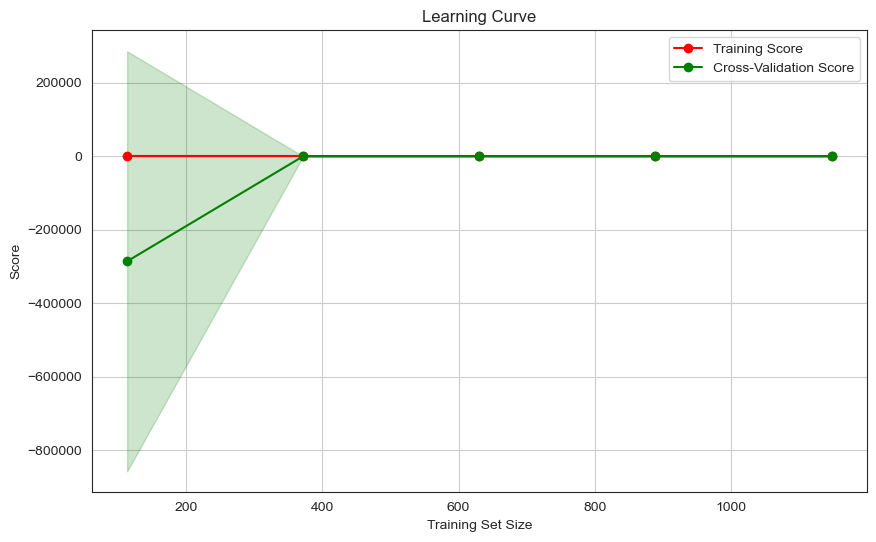

In [41]:
plot_learning_curve(pipe_enet_tf, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

In [43]:
pipe_enet_tf.fit(X_train, y_train)
pipe_enet_tf.predict(X_train)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



array([12.24312375, 12.14819621, 12.32417134, ..., 12.42365144,
       11.81289455, 11.8679798 ])

In [46]:
pipe_enet_tf.score(X_train, y_train)

0.9130441367379446

In [44]:
SalePrice_predict_log = pipe_enet_tf.predict(X_train)
SalePrice_predict = np.expm1(SalePrice_predict_log)

In [45]:
pd.DataFrame(SalePrice_predict)

,0
0,207548.211174
1,188752.311780
2,225070.034346
3,181959.449578
4,301609.918394
...,...
1429,174973.944098
1430,209776.337710
1431,248611.673394
1432,134980.707943


## Lasso TF

In [48]:
#define ML models
lasso = Lasso(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_lasso_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lasso", 
                         model=Lasso(alpha=0.001)
                        )

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_lasso_tf, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



RMSE: 0.12 +/- 0.03


In [50]:
pipe_lasso_tf.fit(X_train, y_train)
pipe_lasso_tf.score(X_train, y_train)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



0.9120358921700172

## SVR TS

## Gradient Boosting TS